#### Feature Engineering

In [1]:
# For data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df0 = pd.read_csv(r"D:\Documents\GitHub\credit_line_eligibility\data\cleaned_data.csv")
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,1.202703,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,1.089146,1990-06-01,16.0,0.0,1.434536,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,0.060161,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,0.623256,2004-07-01,17.0,0.0,0.681703,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,0,RENT,-0.796125,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,-0.513208,2007-08-01,13.0,0.0,0.079328,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,-0.319423,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,-2.120210,2006-09-01,6.0,0.0,-0.739714,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,-0.281432,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,1.893119,1999-03-01,13.0,0.0,0.927930,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
# Deriving state and zip code from address

df0[['state', 'zip_code']] = df0['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [ ]:
df0['zip_code'].nunique(), df0['state'].nunique()

(10, 54)

In [6]:
#Drop address
df0.drop(["address"], axis = 1, inplace=True)

In [7]:
df0['zip_code'] = df0['zip_code'].astype('category')
df0['state'] = df0['state'].astype('category')

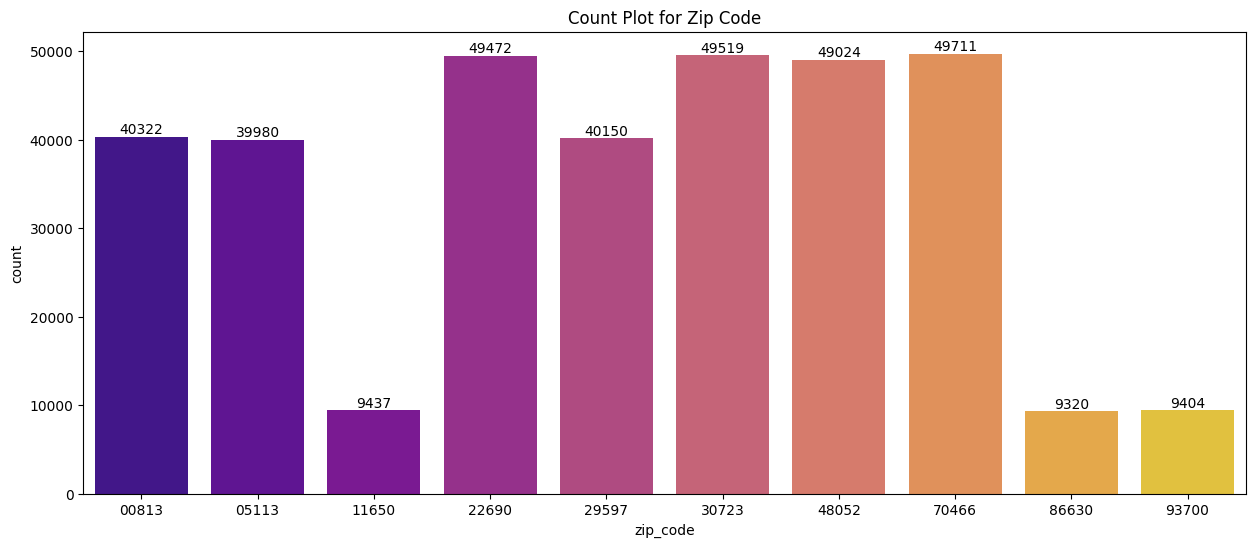

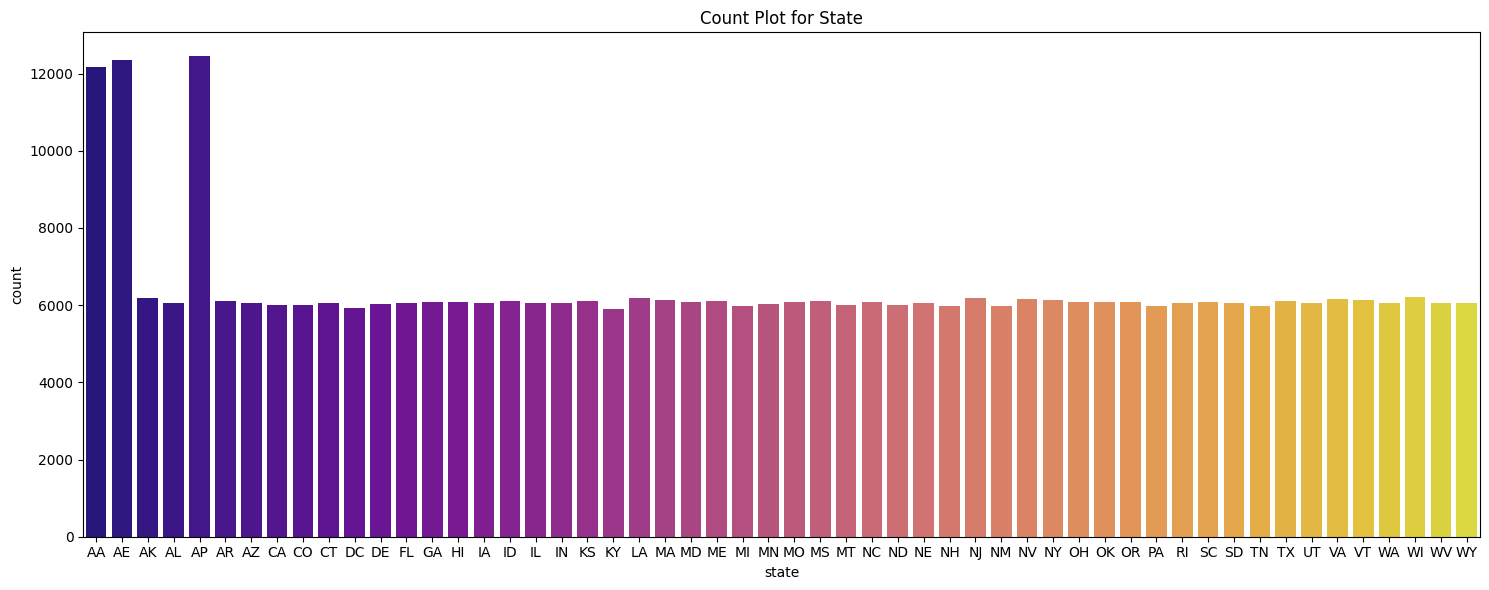

In [8]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x=df0['zip_code'], palette='plasma')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=0.01)
plt.title(f'Count Plot for Zip Code')

plt.figure(figsize=(15,6))
ax = sns.countplot(x=df0['state'], palette='plasma')
plt.title(f'Count Plot for State')

plt.tight_layout()
plt.show()

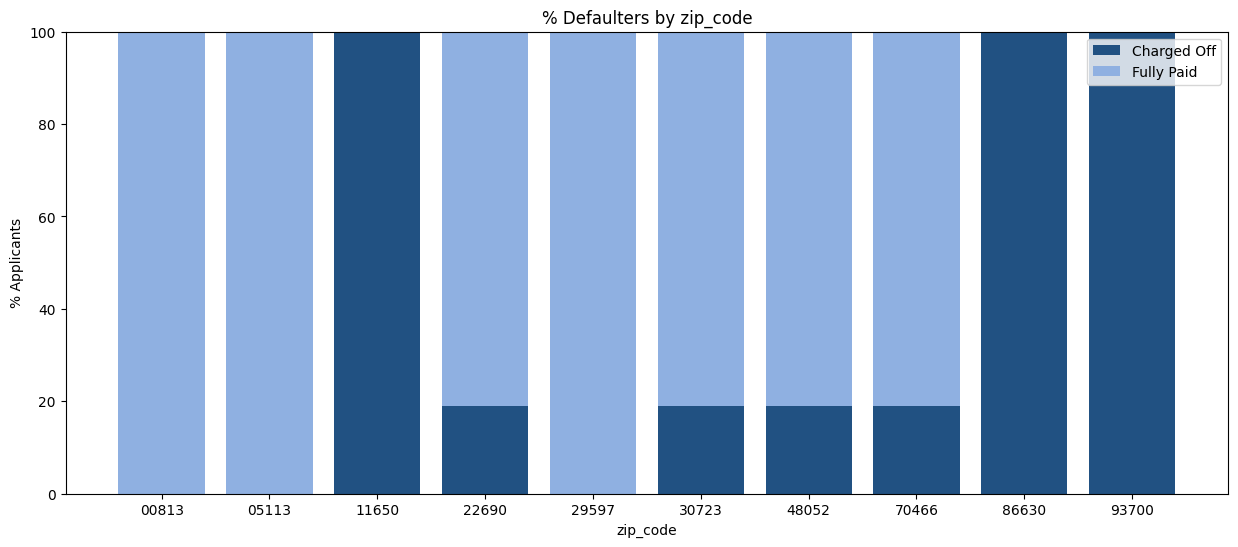

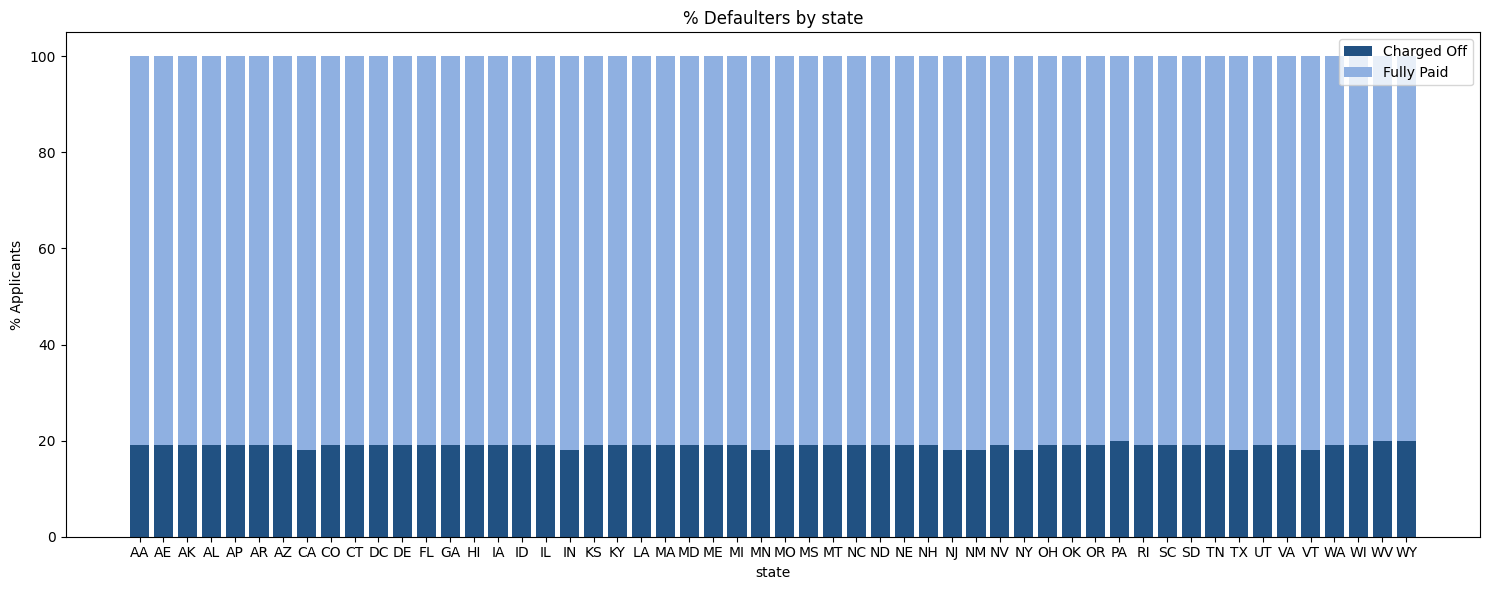

In [9]:
cols = ['zip_code', 'state']

# plt.figure(figsize=(14,20))
# count=1
for col in cols:
  plt.figure(figsize=(15,6))
#   ax=plt.subplot(2,1,count)

  data = df0.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#215182')
  plt.bar(data[col],data['Fully Paid'], color='#8FB0E1', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
#   count += 1

plt.tight_layout()
plt.show()

### Feature Engineering: Address Extraction

During the feature engineering process, we extracted the zip code and state from the address column to assess their potential impact on the model.

##### Findings:
1. The dataset contained only 10 unique zip codes and 50 unique states.
2. Each state was uniquely represented, meaning no state had overlapping zip codes, which is unusual since real-world zip codes often span multiple states.
3. The distribution of default rates across zip codes and states appeared unnatural and unvarying, suggesting that these features do not contribute meaningful variability to the model.
4. The extracted features did not provide additional predictive power.


Since these features do not introduce valuable information for model training, we have chosen to drop them from the final dataset. Also, after performing Exploratory Data Analysis and observing the patterns in data, there are columns like initial_list_status, emp_title, title,  earliest_cr_line, issue_d and sub_grade that will be dropped from the final dataset as they lack any substantial information that can be considered as a decisive factor for the target variable.



In [9]:
df0.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'state', 'zip_code'],
      dtype='object')

In [8]:
# Transforming the features of dataset to create a final dataset for training the models
df1 = df0.copy()

df1.drop(columns=['zip_code', 'state','initial_list_status', 'emp_title', 'title','earliest_cr_line', 
                 'issue_d','sub_grade'], inplace=True)

In [12]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,10,RENT,1.202703,Not Verified,Fully Paid,vacation,1.089146,16.0,0.0,1.434536,41.8,25.0,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B,4,MORTGAGE,0.060161,Not Verified,Fully Paid,debt_consolidation,0.623256,17.0,0.0,0.681703,53.3,27.0,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B,0,RENT,-0.796125,Source Verified,Fully Paid,credit_card,-0.513208,13.0,0.0,0.079328,92.2,26.0,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A,6,RENT,-0.319423,Not Verified,Fully Paid,credit_card,-2.120210,6.0,0.0,-0.739714,21.5,13.0,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C,9,MORTGAGE,-0.281432,Verified,Charged Off,credit_card,1.893119,13.0,0.0,0.927930,69.8,43.0,INDIVIDUAL,1.0,0.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346339 entries, 0 to 346338
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             346339 non-null  float64
 1   term                  346339 non-null  int64  
 2   int_rate              346339 non-null  float64
 3   installment           346339 non-null  float64
 4   grade                 346339 non-null  object 
 5   emp_length            346339 non-null  int64  
 6   home_ownership        346339 non-null  object 
 7   annual_inc            346339 non-null  float64
 8   verification_status   346339 non-null  object 
 9   loan_status           346339 non-null  object 
 10  purpose               346339 non-null  object 
 11  dti                   346339 non-null  float64
 12  open_acc              346339 non-null  float64
 13  pub_rec               346339 non-null  float64
 14  revol_bal             346339 non-null  float64
 15  

In [9]:

# Get the indices of rows to drop
index_to_drop = df1[df1['home_ownership'].isin(['ANY', 'NONE'])].index

# Drop the rows using the indices
df1 = df1.drop(index_to_drop)

In [10]:
df1['loan_status'].isin([np.inf, -np.inf, np.nan]).any()

False

In [11]:
df1['loan_status'] = df1['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [12]:
# Create interaction features
df1['loan_int'] = df1['loan_amnt'] * df1['int_rate']
df1['dti_income'] = df1['dti'] * df1['annual_inc']

In [13]:
df1['purpose'].value_counts(normalize=True)*100

purpose
debt_consolidation    59.809824
credit_card           21.263258
home_improvement       5.820491
other                  5.111302
major_purchase         2.105333
small_business         1.325110
car                    1.153299
medical                1.019604
moving                 0.690997
vacation               0.604659
house                  0.498396
wedding                0.459125
renewable_energy       0.081430
educational            0.057174
Name: proportion, dtype: float64

In [14]:
top_3_purposes = ['debt_consolidation', 'credit_card', 'home_improvement']
df1['purpose']=df1['purpose'].apply(lambda x: x if x in top_3_purposes else 'others')
df1.purpose.value_counts(normalize=True)*100

purpose
debt_consolidation    59.809824
credit_card           21.263258
others                13.106427
home_improvement       5.820491
Name: proportion, dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable
df1['loan_status'] = df1['loan_status'].astype(int)

# Label Encoding the 'grade' variable
le = LabelEncoder()
df1['grade'] = le.fit_transform(df1['grade'])

# Frequency Encoding the 'purpose', 'home_ownership' and 'application_type'
cols = ['purpose', 'home_ownership', 'application_type', 'verification_status']
for col in cols:
    freq_encoding = df1[col].value_counts().to_dict()
    df1[col] = df1[col].map(freq_encoding)



In [19]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,loan_int,dti_income
0,10000.0,36,11.44,329.48,1,10,141326,1.202703,117413,1,45389,1.089146,16.0,0.0,1.434536,41.8,25.0,345799,0.0,0.0,114400.00,1.309919
1,8000.0,36,11.99,265.68,1,4,173740,0.060161,117413,1,207128,0.623256,17.0,0.0,0.681703,53.3,27.0,345799,3.0,0.0,95920.00,0.037496
2,15600.0,36,10.49,506.97,1,0,141326,-0.796125,117893,1,73637,-0.513208,13.0,0.0,0.079328,92.2,26.0,345799,0.0,0.0,163644.00,0.408577
3,7200.0,36,6.49,220.65,0,6,141326,-0.319423,117413,1,73637,-2.120210,6.0,0.0,-0.739714,21.5,13.0,345799,0.0,0.0,46728.00,0.677244
4,24375.0,60,17.27,609.33,2,9,173740,-0.281432,111005,0,73637,1.893119,13.0,0.0,0.927930,69.8,43.0,345799,1.0,0.0,420956.25,-0.532784


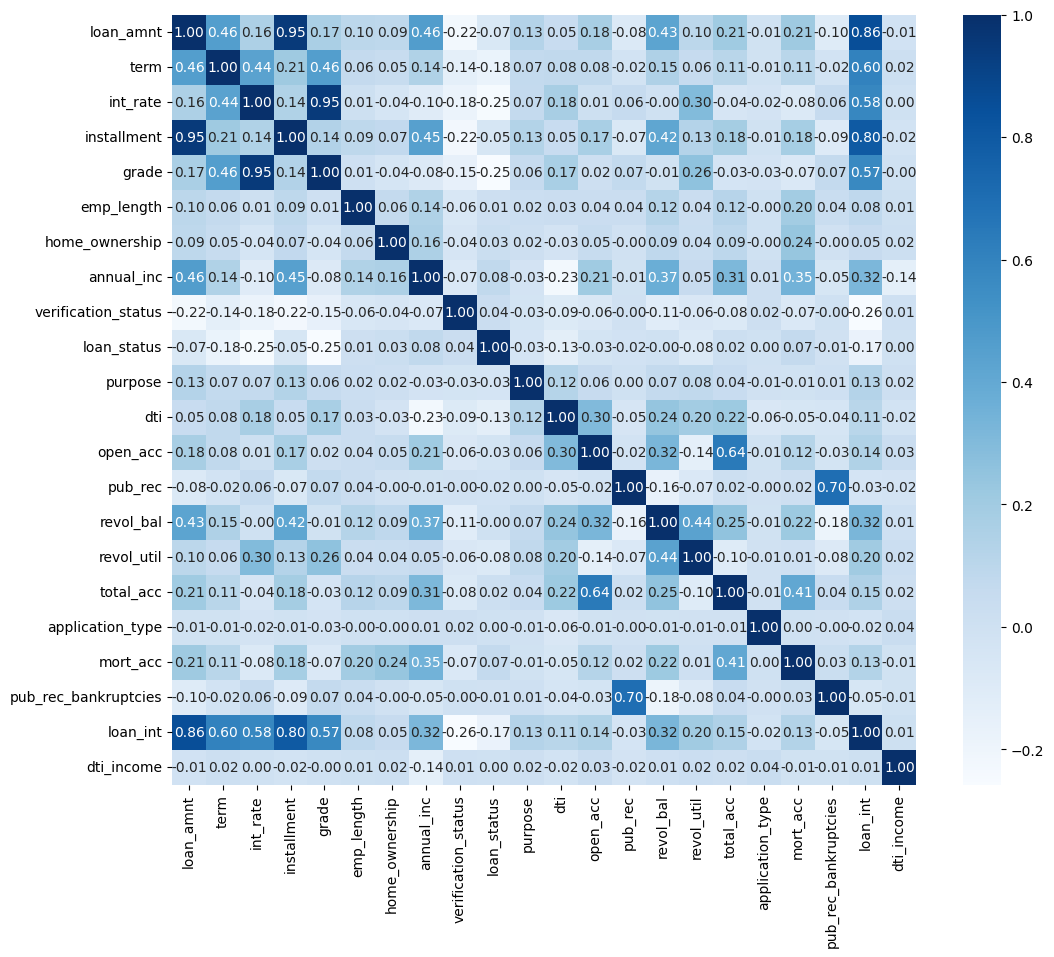

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap = 'Blues')
plt.show()

In [16]:
# Dropping 'installment' and 'grade' columns as they are highly correlated to 'loan_amnt' and 'int_rate' respectively.

df1.drop(columns=['grade', 'installment'], inplace=True)

In [22]:
# Using XGBoost to explain feature importance
df2 = df1.copy()
from sklearn.model_selection import train_test_split

y = df2['loan_status']
y.reset_index(drop=True, inplace=True)
x = df2.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=10)

from xgboost import XGBClassifier

# Train an XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                 Feature  Importance
1                   term    0.249818
2               int_rate    0.232065
4         home_ownership    0.059360
8                    dti    0.049872
6    verification_status    0.040452
15              mort_acc    0.038514
5             annual_inc    0.036605
17              loan_int    0.029858
10               pub_rec    0.027287
0              loan_amnt    0.025358
11             revol_bal    0.025300
18            dti_income    0.024666
16  pub_rec_bankruptcies    0.024203
9               open_acc    0.024030
14      application_type    0.023757
12            revol_util    0.023275
7                purpose    0.022067
13             total_acc    0.021982
3             emp_length    0.021532


 99%|===================| 4937/5000 [00:48<00:00]        

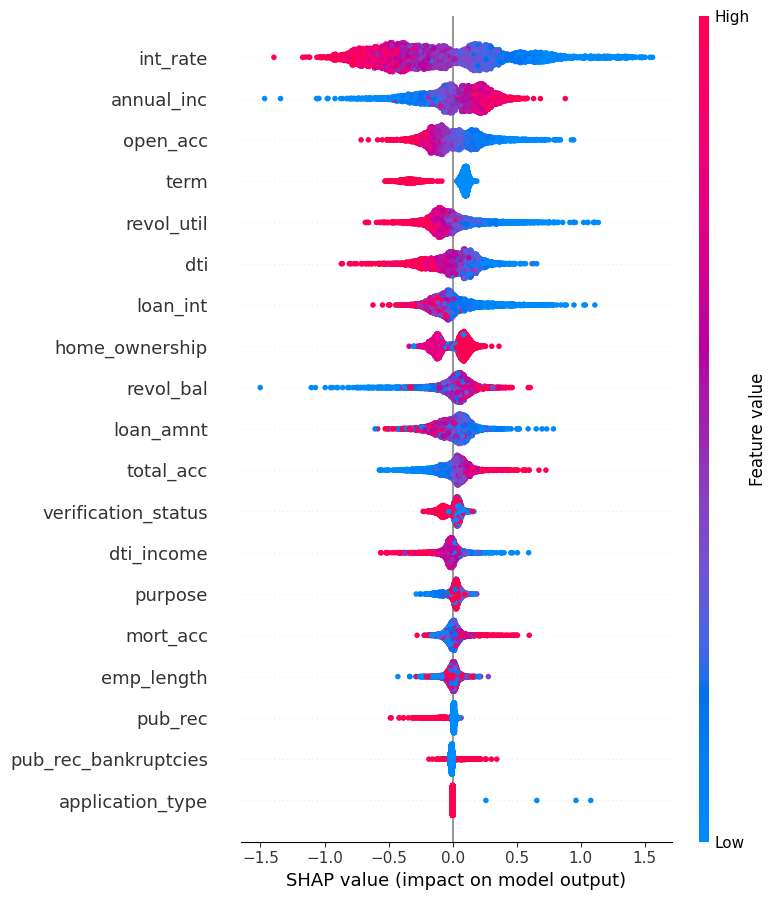

In [24]:
# SHAP Analysis using XGBoost model

import shap

X_sampled = X_train.sample(n=5000, random_state=42)  # Adjust n as needed
explainer = shap.Explainer(model, X_sampled)  
shap_values = explainer(X_sampled)  # Compute SHAP values
shap.summary_plot(shap_values, X_sampled)


In [ ]:
df2 = df1.drop(columns=[ 'application_type', 'pub_rec_bankruptcies','emp_length','pub_rec','mort_acc', 'loan_int', 'dti_income']) 
print(df2.shape)
df2.head()

(346311, 13)


,loan_amnt,term,int_rate,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc
0,10000.0,36,11.44,141326,1.202703,117413,1,45389,1.089146,16.0,1.434536,41.8,25.0
1,8000.0,36,11.99,173740,0.060161,117413,1,207128,0.623256,17.0,0.681703,53.3,27.0
2,15600.0,36,10.49,141326,-0.796125,117893,1,73637,-0.513208,13.0,0.079328,92.2,26.0
3,7200.0,36,6.49,141326,-0.319423,117413,1,73637,-2.120210,6.0,-0.739714,21.5,13.0
4,24375.0,60,17.27,173740,-0.281432,111005,0,73637,1.893119,13.0,0.927930,69.8,43.0


Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.67      0.42     19662
           1       0.89      0.65      0.75     84232

    accuracy                           0.65    103894
   macro avg       0.60      0.66      0.58    103894
weighted avg       0.78      0.65      0.69    103894

Confusion Matrix:
 [[13101  6561]
 [29862 54370]]
ROC AUC Score: 0.7129453924327112


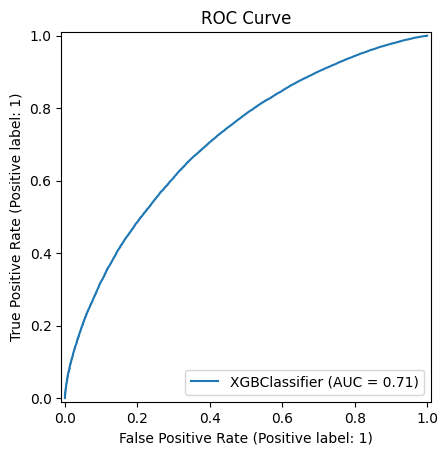

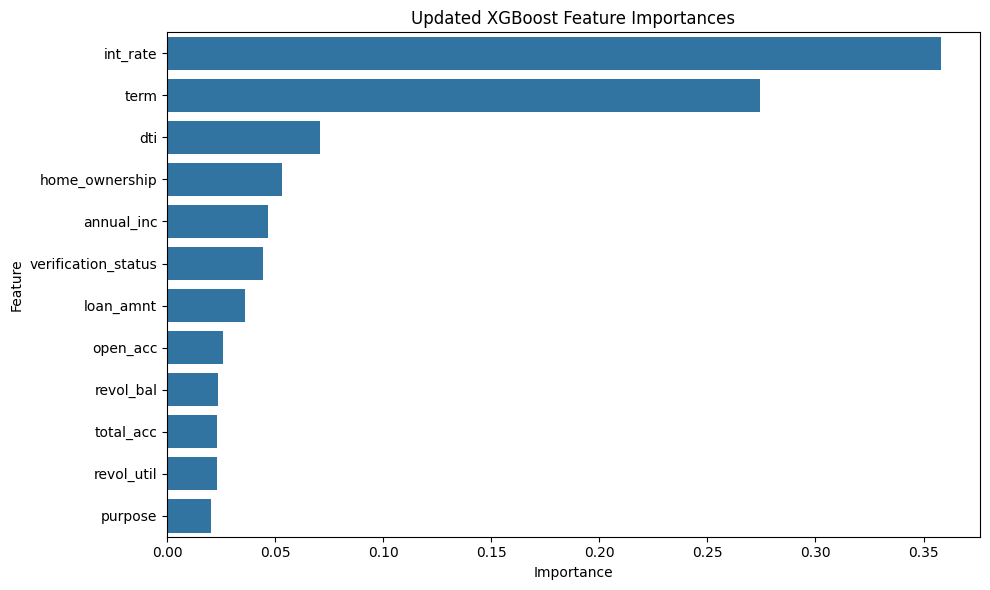

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split


y = df2['loan_status']
X = df2.drop(columns=['loan_status'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=10)

from xgboost import XGBClassifier

# Initialize and fit XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight = 0.2334,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Feature Importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Updated XGBoost Feature Importances")
plt.tight_layout()
plt.show()



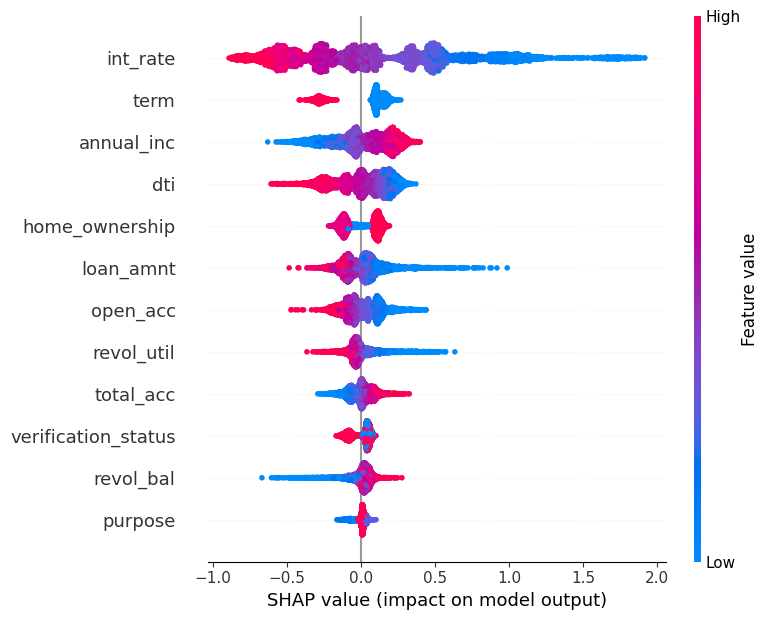

In [19]:
# SHAP (Optional but cool if you want deep insights again)
# explainer = shap.TreeExplainer(xgb_model)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)
import shap

X_sampled = X_test.sample(n=5000, random_state=42)  # Adjust n as needed
explainer = shap.TreeExplainer(xgb_model)  
shap_values = explainer(X_sampled)  # Compute SHAP values
shap.summary_plot(shap_values, X_sampled)

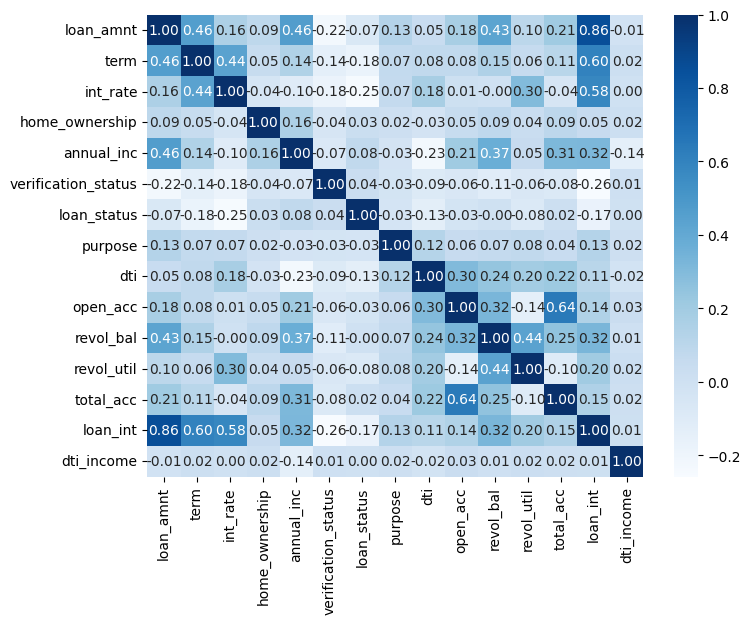

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap = 'Blues')
plt.show()

In [20]:
# Dropping 'application_type' and 'pub_rec_bankruptcies' from the data.

df1.drop(columns=['application_type', 'pub_rec_bankruptcies'], inplace=True)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346311 entries, 0 to 346338
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            346311 non-null  float64
 1   term                 346311 non-null  int64  
 2   int_rate             346311 non-null  float64
 3   emp_length           346311 non-null  int64  
 4   home_ownership       346311 non-null  int64  
 5   annual_inc           346311 non-null  float64
 6   verification_status  346311 non-null  int64  
 7   loan_status          346311 non-null  int32  
 8   purpose              346311 non-null  int64  
 9   dti                  346311 non-null  float64
 10  open_acc             346311 non-null  float64
 11  pub_rec              346311 non-null  float64
 12  revol_bal            346311 non-null  float64
 13  revol_util           346311 non-null  float64
 14  total_acc            346311 non-null  float64
 15  mort_acc             3

In [28]:
df2.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc
0,10000.0,36,11.44,141326,1.202703,117413,1,45389,1.089146,16.0,1.434536,41.8,25.0
1,8000.0,36,11.99,173740,0.060161,117413,1,207128,0.623256,17.0,0.681703,53.3,27.0
2,15600.0,36,10.49,141326,-0.796125,117893,1,73637,-0.513208,13.0,0.079328,92.2,26.0
3,7200.0,36,6.49,141326,-0.319423,117413,1,73637,-2.120210,6.0,-0.739714,21.5,13.0
4,24375.0,60,17.27,173740,-0.281432,111005,0,73637,1.893119,13.0,0.927930,69.8,43.0


In [29]:
# Saving the cleaned data into a cleaned_data.csv and storing it under the data folder

df2.to_csv(r'D:\Documents\GitHub\credit_line_eligibility\data\cleaned_data.csv', index=False)